In [15]:
#https://stackoverflow.com/questions/39657395/how-to-draw-properly-networkx-graphs

In [16]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

folder = 'NTPv4'

In [17]:
nodes = pd.read_csv(folder+'/'+folder.lower()+'_nodes.csv')
nodes.head()

,ID,Field Name,Field Rule
0,1,leap,2 bit type
1,2,version,3 bit int
2,3,mode,3 bit type
3,4,stratum,1 byte int
4,5,poll,1 byte signed int


In [18]:
edges = pd.read_csv(folder+'/'+folder.lower()+'_edges.csv')
edges.head()

,Start,Condition,End
0,1,default edge,2
1,2,default edge,3
2,3,default edge,4
3,4,default edge,5
4,5,default edge,6


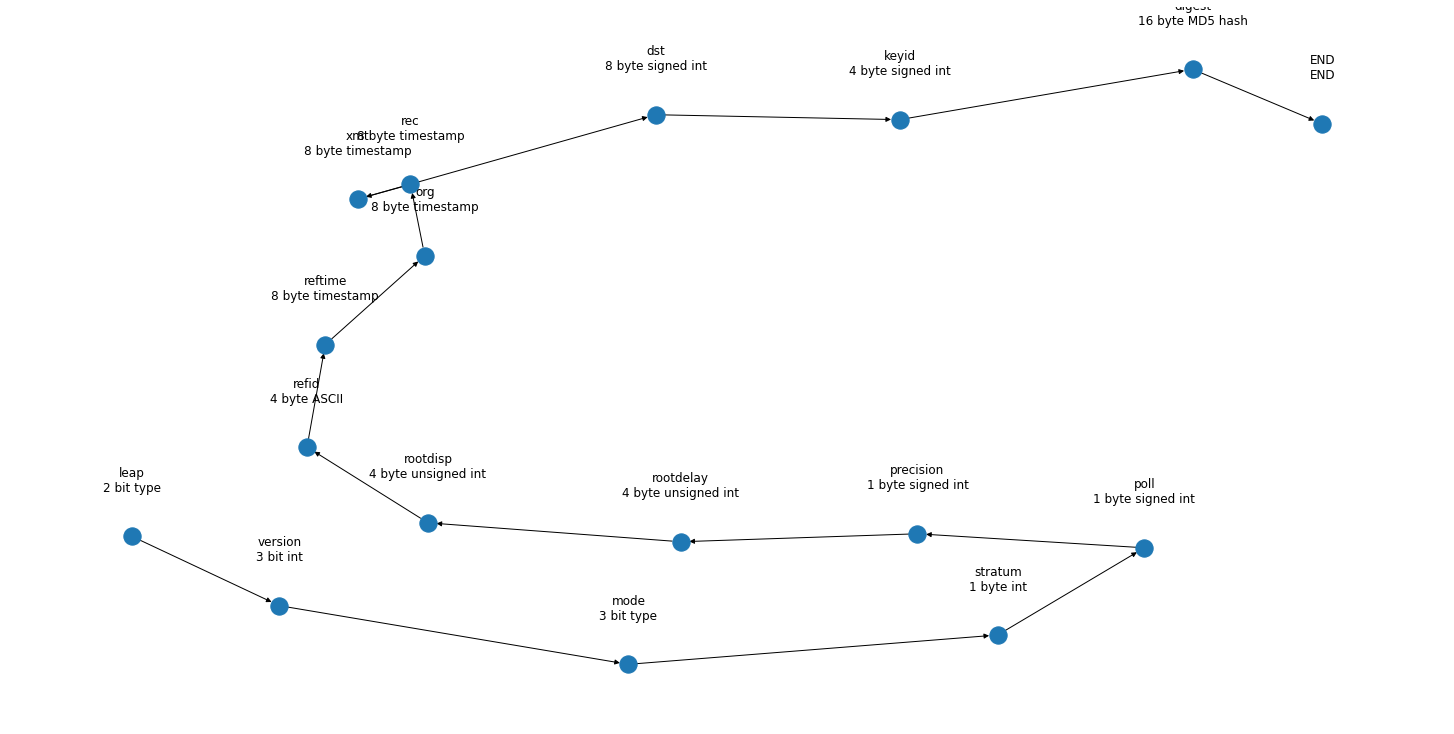

In [19]:
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
PFG = nx.DiGraph()

for i, row in nodes.iterrows():
    PFG.add_node(row['ID'], name=row['Field Name'], rule=row['Field Rule'], label =  row['Field Name'] + '\n' + row['Field Rule'], labeltooltip="this is a tooltip")
    
for i, row in edges.iterrows():
    PFG.add_edge(row['Start'], row['End'], label=row['Condition'])

#Plotting Graph
plt.figure(figsize=(20,10))
pos_nodes = nx.spring_layout(PFG)
nx.draw(PFG, pos_nodes, with_labels=False)

pos_attrs = {}
for node, coords in pos_nodes.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.18)

node_names = nx.get_node_attributes(PFG, 'name')
node_rules = nx.get_node_attributes(PFG, 'rule')

custom_node_attrs = {}
for node, name, rule in zip(node_names.keys(), node_names.values(), node_rules.values()):
    custom_node_attrs[node] = name + '\n' + rule

nx.draw_networkx_labels(PFG, pos_attrs, labels=custom_node_attrs)
plt.show()

In [20]:
A = to_agraph(PFG)
print(A)
A.layout('dot')
A.draw(folder+'/'+folder.lower()+'_pfg.png')

strict digraph "" {
	node [label="\N"];
	1	[label="leap
2 bit type",
		labeltooltip="this is a tooltip",
		name=leap,
		rule="2 bit type"];
	2	[label="version
3 bit int",
		labeltooltip="this is a tooltip",
		name=version,
		rule="3 bit int"];
	1 -> 2	[label="default edge"];
	3	[label="mode
3 bit type",
		labeltooltip="this is a tooltip",
		name=mode,
		rule="3 bit type"];
	2 -> 3	[label="default edge"];
	4	[label="stratum
1 byte int",
		labeltooltip="this is a tooltip",
		name=stratum,
		rule="1 byte int"];
	3 -> 4	[label="default edge"];
	5	[label="poll
1 byte signed int",
		labeltooltip="this is a tooltip",
		name=poll,
		rule="1 byte signed int"];
	4 -> 5	[label="default edge"];
	6	[label="precision
1 byte signed int",
		labeltooltip="this is a tooltip",
		name=precision,
		rule="1 byte signed int"];
	5 -> 6	[label="default edge"];
	7	[label="rootdelay
4 byte unsigned int",
		labeltooltip="this is a tooltip",
		name=rootdelay,
		rule="4 byte unsigned int"];
	6 -> 7	[label="default 

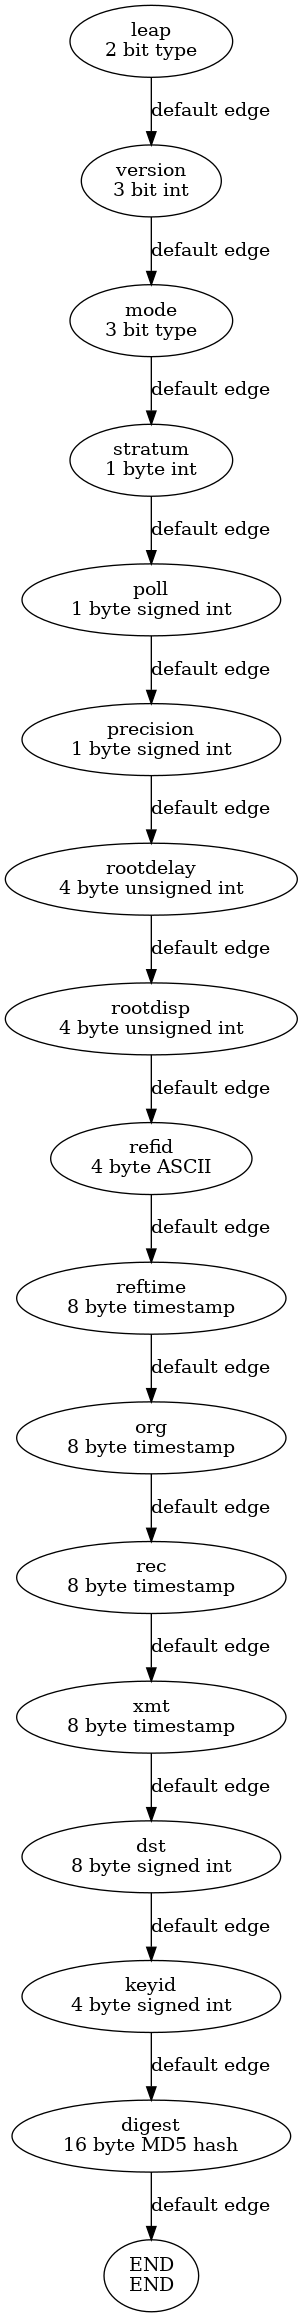

In [21]:
from IPython.display import Image, display
display(Image(filename=folder+'/'+folder.lower()+'_pfg.png'))